In [8]:
#数据加载
import pandas as pd
df = pd.read_csv('./sales.csv',encoding='gbk')
df.columns = ['time','amount']
df

,time,amount
0,2004年1月,740
1,2004年2月,745
2,2004年3月,746
3,2004年4月,780
4,2004年5月,784
5,2004年6月,785
6,2004年7月,793
7,2004年8月,792
8,2004年9月,785
9,2004年10月,782


In [16]:
df.time = pd.to_datetime(df.time,format='%Y年%m月')
df.index = df.time
df

,time,amount
time,,
2004-01-01,2004-01-01,740
2004-02-01,2004-02-01,745
2004-03-01,2004-03-01,746
2004-04-01,2004-04-01,780
2004-05-01,2004-05-01,784
2004-06-01,2004-06-01,785
2004-07-01,2004-07-01,793
2004-08-01,2004-08-01,792
2004-09-01,2004-09-01,785


In [19]:
ps = range(0,5)
qs = range(0,5)
ds = range(1,2)
from itertools import product
parameters = product(ps,ds,qs)
parameters = list(parameters)
parameters

[(0, 0, 1),
 (0, 1, 1),
 (0, 2, 1),
 (0, 3, 1),
 (0, 4, 1),
 (1, 0, 1),
 (1, 1, 1),
 (1, 2, 1),
 (1, 3, 1),
 (1, 4, 1),
 (2, 0, 1),
 (2, 1, 1),
 (2, 2, 1),
 (2, 3, 1),
 (2, 4, 1),
 (3, 0, 1),
 (3, 1, 1),
 (3, 2, 1),
 (3, 3, 1),
 (3, 4, 1),
 (4, 0, 1),
 (4, 1, 1),
 (4, 2, 1),
 (4, 3, 1),
 (4, 4, 1)]

In [23]:
import statsmodels.api as sm
results = []
df_month = df 
best_aic = float('inf')
for params in parameters:
  try:
    p = params[0]
    d = params[1]
    q = params[2]
    model = sm.tsa.statespace.SARIMAX(df_month.amount,
                              order=(p,d,q),
                              enforce_stationarity=False,
                              enforce_invertiblibity=False
                              ).fit()
    
    aic = model.aic
    if aic < best_aic:
      best_model = model
      best_aic = aic
      best_params = params
    results.append([params,model.aic])
  except ValueError:
    print("参数错误：",params)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWar

<bound method SARIMAXResults.summary of <statsmodels.tsa.statespace.sarimax.SARIMAXResults object at 0x7f1877fd0400>>
<bound method SARIMAXResults.summary of <statsmodels.tsa.statespace.sarimax.SARIMAXResults object at 0x7f1882878c50>>
<bound method SARIMAXResults.summary of <statsmodels.tsa.statespace.sarimax.SARIMAXResults object at 0x7f1877fc7eb8>>
<bound method SARIMAXResults.summary of <statsmodels.tsa.statespace.sarimax.SARIMAXResults object at 0x7f1877fc7eb8>>
<bound method SARIMAXResults.summary of <statsmodels.tsa.statespace.sarimax.SARIMAXResults object at 0x7f1877fc7eb8>>
<bound method SARIMAXResults.summary of <statsmodels.tsa.statespace.sarimax.SARIMAXResults object at 0x7f1877fc7eb8>>
<bound method SARIMAXResults.summary of <statsmodels.tsa.statespace.sarimax.SARIMAXResults object at 0x7f1877fc7eb8>>


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<bound method SARIMAXResults.summary of <statsmodels.tsa.statespace.sarimax.SARIMAXResults object at 0x7f1877fc7eb8>>
<bound method SARIMAXResults.summary of <statsmodels.tsa.statespace.sarimax.SARIMAXResults object at 0x7f1877fc7eb8>>
<bound method SARIMAXResults.summary of <statsmodels.tsa.statespace.sarimax.SARIMAXResults object at 0x7f1877fc7eb8>>
<bound method SARIMAXResults.summary of <statsmodels.tsa.statespace.sarimax.SARIMAXResults object at 0x7f1877fc7eb8>>


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<bound method SARIMAXResults.summary of <statsmodels.tsa.statespace.sarimax.SARIMAXResults object at 0x7f1877fc7eb8>>
<bound method SARIMAXResults.summary of <statsmodels.tsa.statespace.sarimax.SARIMAXResults object at 0x7f1877fc7eb8>>
<bound method SARIMAXResults.summary of <statsmodels.tsa.statespace.sarimax.SARIMAXResults object at 0x7f1877fc7eb8>>
<bound method SARIMAXResults.summary of <statsmodels.tsa.statespace.sarimax.SARIMAXResults object at 0x7f1877fc7eb8>>


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<bound method SARIMAXResults.summary of <statsmodels.tsa.statespace.sarimax.SARIMAXResults object at 0x7f1877fc7eb8>>
<bound method SARIMAXResults.summary of <statsmodels.tsa.statespace.sarimax.SARIMAXResults object at 0x7f1877fc7eb8>>
<bound method SARIMAXResults.summary of <statsmodels.tsa.statespace.sarimax.SARIMAXResults object at 0x7f1877fd0278>>


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<bound method SARIMAXResults.summary of <statsmodels.tsa.statespace.sarimax.SARIMAXResults object at 0x7f1877fd0278>>
<bound method SARIMAXResults.summary of <statsmodels.tsa.statespace.sarimax.SARIMAXResults object at 0x7f1877fd0278>>


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<bound method SARIMAXResults.summary of <statsmodels.tsa.statespace.sarimax.SARIMAXResults object at 0x7f1877fd0278>>
<bound method SARIMAXResults.summary of <statsmodels.tsa.statespace.sarimax.SARIMAXResults object at 0x7f1877fd0278>>
<bound method SARIMAXResults.summary of <statsmodels.tsa.statespace.sarimax.SARIMAXResults object at 0x7f1877fd0438>>
<bound method SARIMAXResults.summary of <statsmodels.tsa.statespace.sarimax.SARIMAXResults object at 0x7f1877fd0438>>


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<bound method SARIMAXResults.summary of <statsmodels.tsa.statespace.sarimax.SARIMAXResults object at 0x7f1877fd0438>>


In [25]:
  print(best_params)
  print(best_model.summary())

(4, 2, 1)
                           Statespace Model Results                           
Dep. Variable:                 amount   No. Observations:                   42
Model:               SARIMAX(4, 2, 1)   Log Likelihood                -125.190
Date:                Fri, 15 Jan 2021   AIC                            262.381
Time:                        09:56:46   BIC                            271.882
Sample:                    01-01-2004   HQIC                           265.697
                         - 06-01-2007                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2136      0.209      1.024      0.306      -0.195       0.622
ar.L2         -0.1432      0.220     -0.651      0.515      -0.575       0.288
ar.L3          0.0923      0.206      0.44

In [47]:
df_month2 = df_month[['amount']]
future_month = 4
last_month = pd.to_datetime(df_month2.index[len(df_month2)-1])

import calendar
from datetime import timedelta

date_list = []
for i in range(future_month):
  year = last_month.year
  month = last_month.month
  next_month_days = calendar.monthrange(year, month)[1]
  last_month = last_month + timedelta(days=next_month_days)
  print(last_month)
  date_list.append(last_month)


2007-07-01 00:00:00
2007-08-01 00:00:00
2007-09-01 00:00:00
2007-10-01 00:00:00


In [49]:
future = pd.DataFrame(index=date_list,columns=df_month.columns)
df_month2 = pd.concat([df_month2,future])
df_month2

,amount,time
2004-01-01,740,NaN
2004-02-01,745,NaN
2004-03-01,746,NaN
2004-04-01,780,NaN
2004-05-01,784,NaN
2004-06-01,785,NaN
2004-07-01,793,NaN
2004-08-01,792,NaN
2004-09-01,785,NaN
2004-10-01,782,NaN


In [50]:
df_month2['forecast'] = best_model.get_prediction(start=2,end=len(df_month2)).predicted_mean
print(df_month2)

           amount time    forecast
2004-01-01    740  NaN         NaN
2004-02-01    745  NaN         NaN
2004-03-01    746  NaN  676.775409
2004-04-01    780  NaN  793.231202
2004-05-01    784  NaN  775.975229
2004-06-01    785  NaN  830.273931
2004-07-01    793  NaN  793.782676
2004-08-01    792  NaN  793.421826
2004-09-01    785  NaN  795.226343
2004-10-01    782  NaN  786.974079
2004-11-01    789  NaN  782.351669
2004-12-01    793  NaN  793.412068
2005-01-01    795  NaN  796.945202
2005-02-01    790  NaN  798.763421
2005-03-01    796  NaN  789.144957
2005-04-01    810  NaN  799.645570
2005-05-01    830  NaN  814.505870
2005-06-01    843  NaN  838.459081
2005-07-01    843  NaN  847.816162
2005-08-01    852  NaN  844.523899
2005-09-01    854  NaN  855.864591
2005-10-01    860  NaN  855.276370
2005-11-01    859  NaN  867.049162
2005-12-01    864  NaN  860.944428
2006-01-01    865  NaN  870.270201
2006-02-01    854  NaN  867.783299
2006-03-01    850  NaN  856.202337
2006-04-01    855  N

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22825 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27827 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36229 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24066 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_a

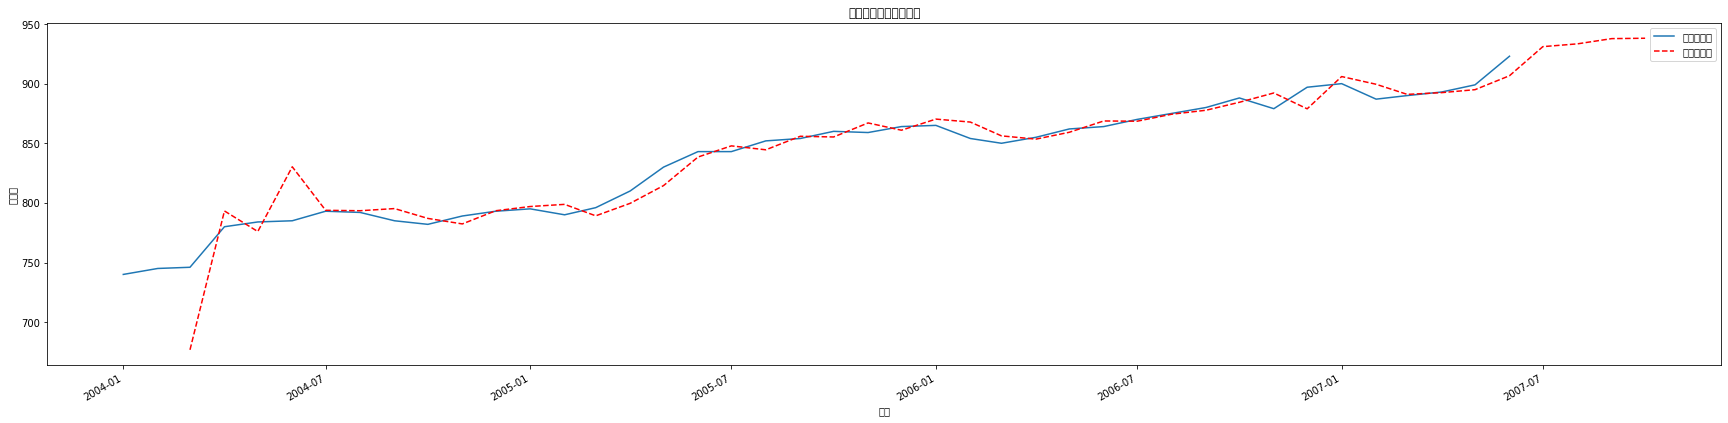

In [55]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(30,7))
df_month2.amount.plot(label = '实际销售额')
df_month2.forecast.plot(color = 'r',ls='--',label='预测销售额')
plt.legend()
plt.title('天河超市销售额（月）')
plt.xlabel('时间')
plt.ylabel('销售额')
plt.show()